# Exercise 7 chapter 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay


In [2]:
from sklearn.datasets import make_moons

In [3]:
def makeSpiral(fans,N,ph_var=0.1,ph_max = 7,r_min = 0.1):
    """
    Create a spiral dataset with N points per fan and Gaussian noise with standard deviation noise.
    """
    X = np.zeros((N,2))
    y = np.zeros(N)
    T = np.random.randint(0,fans,N)
    for i in range(N):
        r = r_min + np.random.rand()*(1-r_min)
        ph = r*ph_max + ph_var*np.random.randn()+T[i]*2*np.pi/fans
        X[i,0] = r*np.cos(ph)
        X[i,1] = r*np.sin(ph)
        y[i] = T[i]
    return X,y

### a) generating a dataset. 

Use make_moons to simulate a data set: 
```python
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
```
After you have generated it, check the shape, print out some rows of it and also do a plot: 

```python
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data generated by make_moons() function')
```

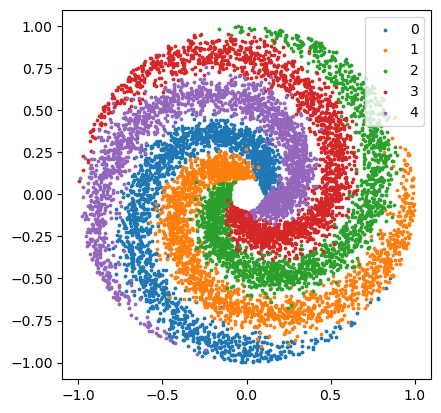

In [4]:
N = 10000

MOON = 0
if MOON:
  X,y = make_moons(n_samples=N, noise=0.3, random_state=42)
  plt.scatter(X[:, 0], X[:, 1], c=y,s=3,alpha=0.5)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Data generated by make_moons() function')
else:
  K = 5
  X, y = makeSpiral(K, N, 0.3, 5, 0.1)
  # aa=plt.scatter(X[:,0],X[:,1],c=y)
  for i in np.arange(0, K):
      plt.scatter(X[y == i, 0], X[y == i, 1], label=i, s=3)
  plt.gca().set_aspect("equal")
  _ = plt.legend()
  plt.set_cmap("jet")

### b) Use train_test_split() to split the dataset into a training set and a test set.

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# ax = plt.bar(['Train', 'Val', 'Test'], [len(X_train)/len(X), len(X_val)/len(X), len(X_test)/len(X)])
# _=plt.bar_label(ax,fmt="{:.0%}")


### c) Use grid search  to find good hyperparameter values for a DecisionTreeClassifier.

You can try the following hyperparameters:
```python
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
```

### d) Train your model on the full training set using the best found model parameters and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

### OBS: By default, GridSearchCV trains the best model found on the whole training set since the hyperparameter refit has the default value True. 

Check the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html and look at the function parameter refit = True.

Eller https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e


In [6]:
param_grid = {
    "max_leaf_nodes": list(range(2,100,2)),
    # "max_depth": [3, 5, 10],
    "min_samples_split": [2, 3, 4],
    # "criterion": ["gini", "entropy"],
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring="accuracy",verbose=1,n_jobs=-1,refit=True,
)
grid_search.fit(X_train, y_train)
# grid_search.cv_results_

Fitting 5 folds for each of 147 candidates, totalling 735 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                            22, 24, 26, 28, 30, 32, 34, 36, 38,
                                            40, 42, 44, 46, 48, 50, 52, 54, 56,
                                            58, 60, ...],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy', verbose=1)

In [7]:

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_leaf_nodes': 96, 'min_samples_split': 2}
Best Accuracy: 0.9434375000000002


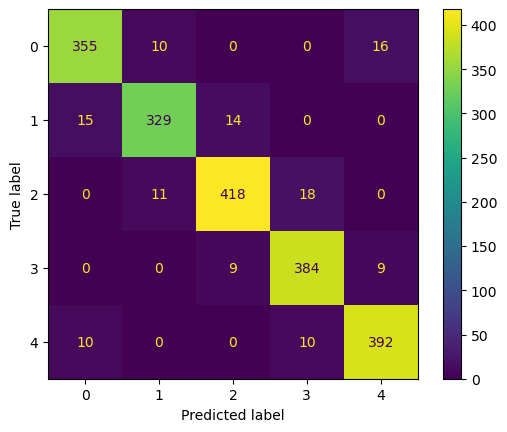

In [8]:
pr=grid_search.predict(X_test) 
# print(classification_report(y_test, pr))
ConfusionMatrixDisplay(confusion_matrix(y_test, pr)).plot()

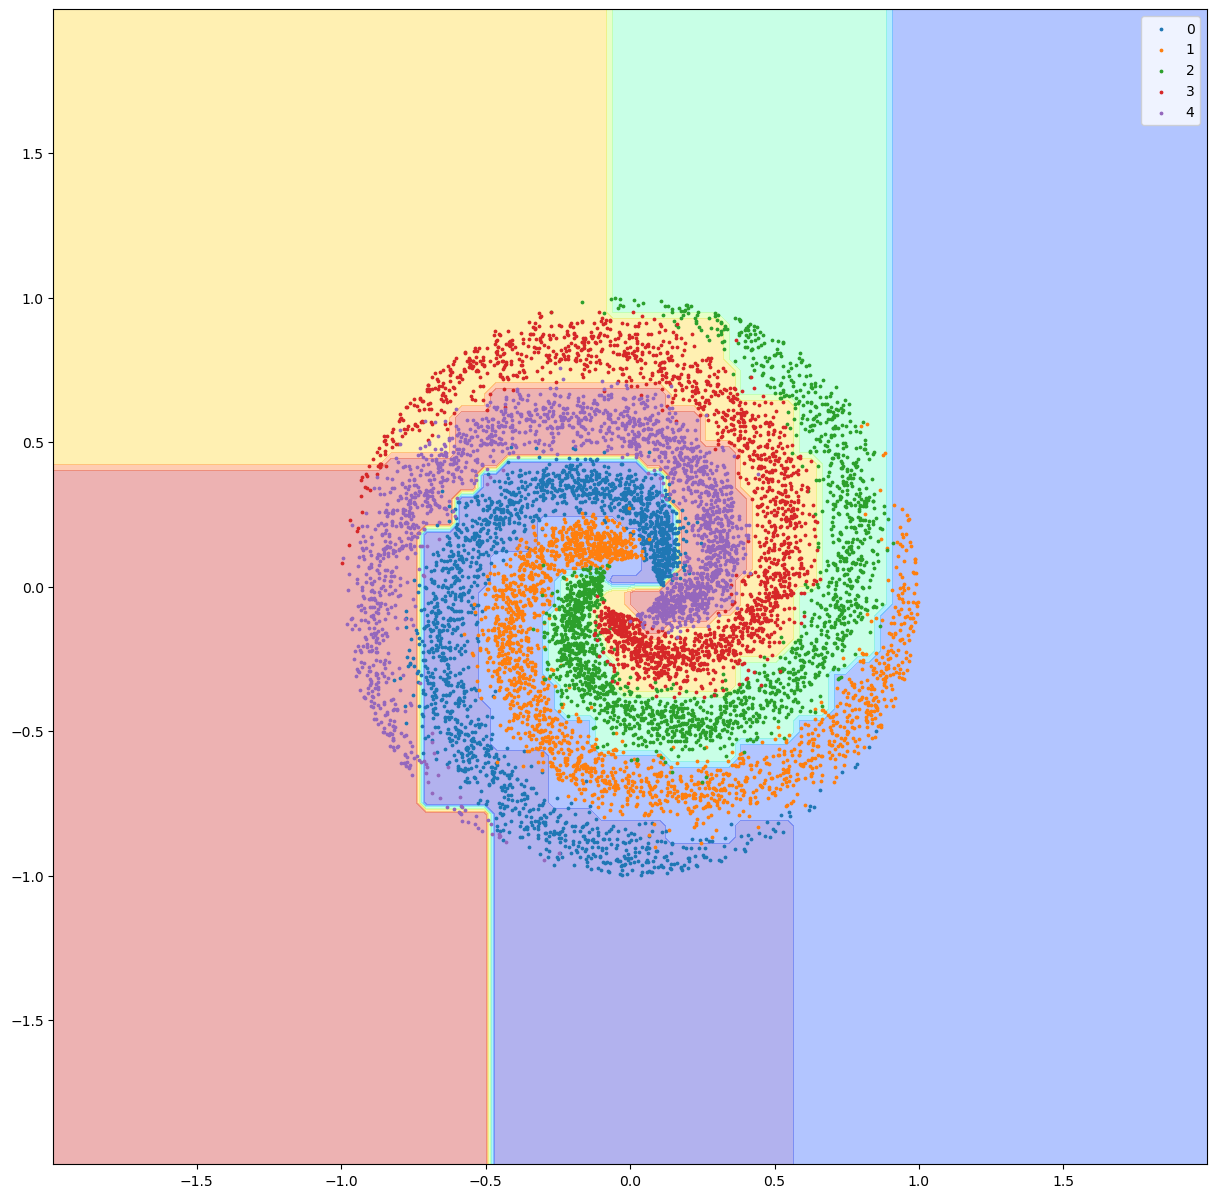

In [9]:
disp = DecisionBoundaryDisplay.from_estimator(
    grid_search, X, response_method="predict",
    alpha=0.3
)

M = len(np.unique(y)) # Classes
for i in np.arange(0,M):
    disp.ax_.scatter(X[y == i, 0], X[y == i, 1], label=i, s=3)#, alpha=0.4)
disp.ax_.set_aspect("equal")
disp.figure_.set_size_inches(15,15)
_ = plt.legend()



In [10]:
if MOON:
  dt=plot_tree(grid_search.best_estimator_, proportion=True,fontsize=8)
  plt.gcf().set_size_inches(20,15)
  plt.show()